In [1]:
import time
import numpy as np
import pandas as pd

from SA.simulatedAnnealing import simulatedAnnealing
from problems.TSP.SimulatedAnnelingOperationsTSP import SimulatedAnnelingOperationsTSP as TSP

from utils.calculations import Point
from utils.manipulationFile import read_txt_file
import utils.cooling as alpha
from utils.graphics import create_plot, create_box_plots

from scripts.tsp import experiment, experiment_one_SA



In [2]:
PATH: str = "samples/eil100.txt"
problem: str = "TSP100"

## Teste para o Grafo com 51 cidades

+ N = 100_000
+ Número de Cidades Criada por criação de vizinho: 1, 3, 5
+ Equações Testadas: 5, 8, 9
+ TN = 0.01
+ SA_Max: 1, 5, 10

In [3]:
# df = experiment(
#     problem=problem,
#     path=PATH,
#     num_interation=10,
#     num_neighbors_mod_list=[1],
#     num_neighbors=500,
#     SA_max_list=[1, 5, 10],
#     eq_list=[9],
#     TN=0.01,
#     N=100_000,
#     t=False
# )


# Teste para o Grafico com 100 cidades

+ N = 250_000
+ Número de Cidades Criada por criação de vizinho: 1
+ Equações Testadas: 1, 7, 9
+ TN = 0.01
+ SA_Max: 1, 5, 10

In [14]:
df = experiment(
    problem=problem,
    path=PATH,
    num_interation=10,
    num_neighbors_mod_list=[1],
    num_neighbors=500,
    SA_max_list=[1, 5, 10],
    eq_list=[9],
    TN=0.01,
    N=250_000,
    t=False
)


Loading:   0%|          | 0/3 [00:00<?, ?it/s]

7508.8848228402785


Loading:  33%|███▎      | 1/3 [03:49<07:38, 229.34s/it]

num_elements: 100
distance: 29066.893050720908
elements: [44, 90, 97, 86, 50, 92, 27, 7, 41, 88, 66, 63, 39, 53, 1, 43, 49, 81, 94, 12, 75, 32, 47, 99, 70, 40, 2, 42, 45, 28, 13, 29, 38, 36, 4, 51, 77, 95, 33, 82, 54, 19, 76, 22, 14, 16, 73, 20, 71, 83, 9, 18, 52, 69, 65, 25, 64, 3, 96, 55, 79, 30, 74, 91, 0, 5, 48, 89, 62, 46, 57, 60, 24, 80, 68, 72, 67, 84, 8, 6, 56, 11, 26, 85, 34, 61, 59, 31, 10, 58, 35, 98, 37, 23, 17, 78, 87, 15, 21, 93]

7978.21354156718


Loading:  67%|██████▋   | 2/3 [23:36<13:12, 792.66s/it]

num_elements: 100
distance: 24173.649170044126
elements: [92, 27, 41, 88, 30, 79, 55, 96, 3, 64, 25, 65, 52, 18, 74, 7, 91, 0, 62, 5, 48, 89, 9, 71, 20, 10, 14, 16, 58, 73, 83, 78, 87, 15, 69, 21, 93, 17, 23, 37, 98, 35, 46, 31, 44, 90, 97, 22, 76, 59, 61, 34, 85, 26, 11, 19, 56, 86, 50, 24, 80, 60, 57, 66, 68, 63, 39, 53, 1, 43, 49, 72, 67, 84, 38, 29, 95, 77, 51, 4, 36, 32, 75, 12, 94, 81, 8, 6, 54, 82, 33, 28, 45, 42, 2, 13, 70, 40, 99, 47]

8737.679154628247


Loading: 100%|██████████| 3/3 [1:03:38<00:00, 1272.83s/it]

num_elements: 100
distance: 27293.970666069432
elements: [99, 70, 40, 42, 45, 82, 54, 26, 85, 34, 61, 59, 97, 90, 31, 16, 14, 44, 22, 76, 19, 11, 6, 8, 38, 84, 67, 72, 80, 24, 60, 50, 86, 56, 33, 28, 2, 13, 47, 29, 95, 77, 51, 4, 36, 32, 75, 12, 94, 81, 1, 30, 79, 55, 96, 3, 64, 25, 65, 78, 83, 9, 71, 20, 73, 58, 10, 46, 0, 74, 18, 52, 87, 15, 69, 21, 93, 17, 23, 37, 98, 35, 89, 48, 5, 62, 91, 7, 41, 88, 66, 27, 92, 57, 68, 63, 39, 53, 43, 49]



In [15]:
df 

,Problema,SA_max,Equação,Número de Vizinhos,Número de Interações,Temperatura Inicial,Melhor Solução,Média,Desvio Padrão,Tempo (s),Imagem
0,TSP100,1,9,1,250000,7508.884823,26613.589834,30762.265585,2784.354045,229.343962,con-PTSP100-SA1-EQ9-N250000-174574601397411576...
1,TSP100,5,9,1,250000,7978.213542,24159.987833,25538.975214,1461.135598,1186.978981,con-PTSP100-SA5-EQ9-N250000-174574720089961094...
2,TSP100,10,9,1,250000,8737.679155,24396.027908,25845.430204,1006.608982,2402.022100,con-PTSP100-SA10-EQ9-N250000-17457496026853653...


In [6]:
id = df["Melhor Solução"].idxmin()

id

2

In [16]:
df_media = df[["SA_max", "Equação", "Número de Vizinhos", "Melhor Solução", "Média", "Desvio Padrão" ]].sort_values(["SA_max"])
df_media

,SA_max,Equação,Número de Vizinhos,Melhor Solução,Média,Desvio Padrão
0,1,9,1,26613.589834,30762.265585,2784.354045
1,5,9,1,24159.987833,25538.975214,1461.135598
2,10,9,1,24396.027908,25845.430204,1006.608982


[(49, 25), (25, 41), (41, 16), (16, 22), (22, 1), (1, 7), (7, 3), (3, 43), (43, 8), (8, 24), (24, 21), (21, 31), (31, 34), (34, 19), (19, 40), (40, 5), (5, 47), (47, 32), (32, 50), (50, 36), (36, 29), (29, 0), (0, 35), (35, 30), (30, 18), (18, 11), (11, 2), (2, 9), (9, 39), (39, 15), (15, 33), (33, 6), (6, 44), (44, 23), (23, 48), (48, 26), (26, 37), (37, 12), (12, 28), (28, 45), (45, 27), (27, 20), (20, 38), (38, 42), (42, 13), (13, 10), (10, 46), (46, 14), (14, 17), (17, 4), (4, 49)]
[(19, 10), (10, 47), (47, 32), (32, 5), (5, 40), (40, 12), (12, 17), (17, 48), (48, 31), (31, 21), (21, 46), (46, 38), (38, 45), (45, 0), (0, 37), (37, 6), (6, 39), (39, 14), (14, 34), (34, 3), (3, 13), (13, 9), (9, 36), (36, 16), (16, 28), (28, 30), (30, 29), (29, 41), (41, 43), (43, 23), (23, 25), (25, 8), (8, 27), (27, 18), (18, 50), (50, 1), (1, 49), (49, 33), (33, 4), (4, 35), (35, 24), (24, 42), (42, 15), (15, 7), (7, 44), (44, 26), (26, 22), (22, 20), (20, 2), (2, 11), (11, 19)]
[(19, 10), (10, 47

Loading: 100%|██████████| 10/10 [00:00<00:00, 445.34it/s]

[(38, 19), (19, 31), (31, 15), (15, 28), (28, 2), (2, 45), (45, 35), (35, 47), (47, 30), (30, 50), (50, 3), (3, 49), (49, 23), (23, 32), (32, 37), (37, 24), (24, 25), (25, 40), (40, 33), (33, 41), (41, 26), (26, 27), (27, 12), (12, 8), (8, 0), (0, 6), (6, 46), (46, 20), (20, 17), (17, 5), (5, 4), (4, 21), (21, 29), (29, 36), (36, 44), (44, 10), (10, 1), (1, 14), (14, 39), (39, 42), (42, 18), (18, 11), (11, 34), (34, 7), (7, 43), (43, 48), (48, 16), (16, 13), (13, 9), (9, 22), (22, 38)]
[(38, 19), (19, 31), (31, 15), (15, 28), (28, 2), (2, 45), (45, 35), (35, 47), (47, 30), (30, 50), (50, 3), (3, 22), (22, 23), (23, 32), (32, 37), (37, 24), (24, 25), (25, 40), (40, 33), (33, 41), (41, 26), (26, 27), (27, 12), (12, 8), (8, 0), (0, 6), (6, 46), (46, 20), (20, 17), (17, 5), (5, 4), (4, 21), (21, 29), (29, 36), (36, 44), (44, 10), (10, 1), (1, 14), (14, 39), (39, 42), (42, 18), (18, 11), (11, 34), (34, 7), (7, 43), (43, 48), (48, 16), (16, 13), (13, 9), (9, 49), (49, 38)]
[(38, 19), (19, 31

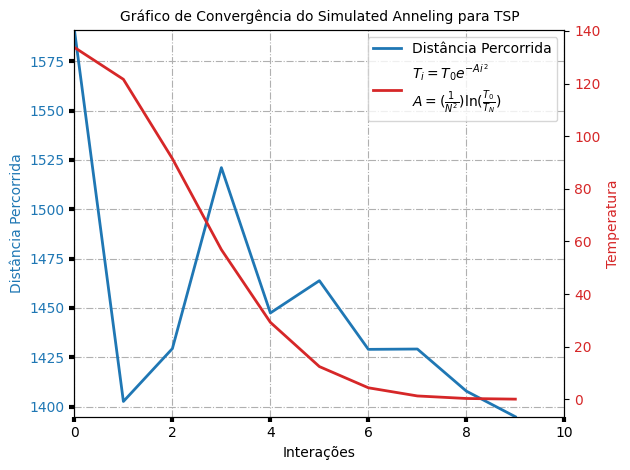

num_elements: 51
distance: 1371.6449257809027
elements: [1, 19, 31, 15, 34, 2, 47, 12, 17, 26, 37, 35, 7, 22, 23, 4, 48, 41, 40, 43, 21, 20, 27, 3, 8, 0, 6, 18, 24, 33, 5, 42, 25, 29, 36, 44, 10, 38, 14, 46, 13, 39, 50, 9, 28, 30, 32, 16, 11, 45, 49]



1371.6449257809027

In [7]:
res = experiment_one_SA(
    problem="TSP51",
    path="samples/eil51.txt",
    num_interation=1,
    num_neighbors_mod=1,
    num_neighbors=500,
    SA_max=10,
    eq=9,
    TN=0.01,
    N= 10,
    t=0,
    show=True,
    bar=True
)

# ponto ótimo 426 e 21282

res[6]

In [9]:
# 1, 7, 9
# 500_000

# 5 - 250 mil - 0.01 - 26975.790188923533
# 5 - 250 mil - 0.001 - 27445.463211666
# 5 - 500 mil - 0.01 -  28014.50793363138
# 8 - 250 mil - 0.01 - 26037.439728639605
# 9 - 250 mil - 0.01 - 29519.1201606241
# 1 - 250 mil - 0.01 - 24959.676882024232
# 1 - 500 mil - 0.01 - 24937.98129793638
# 2 - 250 mil - 0.01 - 40098.787619479364
# 2 - 250 mil - 0.01 - 28972.254017006708
# 3 - 500 mil - 0.01 - 24800.511536552847
# 3 - 750 mil - 0.01 - 26029.070807291107
# 6 - 250 mil - 0.01 - 24667.184337699124
# 6 - 500 mil - 0.01 - 24871.197352076117
# 7 - 250 mil - 0.01 - 23231.77226248191
# 7 - 500 mil - 0.01 - 21724.412026582584
# 8 - 250 mil - 0.01 - 26516.417898300086
# 9 - 250 mil - 0.01 - 24346.15246539464
# 9 - 500 mil - 0.01 -  23330.304046908404


In [3]:
df_1 = pd.read_csv("logs/result-TSP100-1745723465997139084.csv")
df_2 = pd.read_csv("logs/result-TSP100-1745743328928818286.csv")
df_3 = pd.read_csv("logs/result-TSP100-1745749603669342786.csv")

df_51 = pd.concat([df_1, df_2, df_3])
df_51[["SA_max", "Equação", "Número de Vizinhos", "Melhor Solução", "Média", "Desvio Padrão" ]].sort_values(["SA_max"]).to_csv("logs/table100.csv")

In [8]:
df_51["Melhor Solução"].min()

np.float64(22610.90881081348)